# Final B: Multi-robot path planning

For your final, you will be studying multiple robots navigating in a grid, such as those that navigate automated warehouses.  The robots move step by step along integer coordinates, and must respect certain validity constraints. Robots must not collide into one another, and there are certain fixed obstacles that cannot be passed through.  They must also stay within the limits of the grid.

As many robots as you wish may move simultaneously at a single time step, as long as one robot does not enter the grid cell occupied by another at the start of the time step.  You can think of this as a robot "reserving" its current grid cell and its next grid cell.  For the robot to make a valid move, moth these grid cells must be unoccupied by another robot at the start and the end of the step.

In [1]:
%load_ext autoreload
%autoreload 2

#these might be useful
from klampt import *
from IPython.display import clear_output
import ipywidgets as widgets
import ipyklampt
import numpy as np
import math

In [31]:
from matplotlib.patches import Rectangle,Circle

class RobotGridSimulation:
    def __init__(self,Nrobots,width,height):
        self.width = width
        self.height = height
        self.robots = [(0,0) for i in range(Nrobots)]
        self.obstacles = [[False]*height for i in range(width)]
        self.crashed = False
    def state(self):
        return [r for r in self.robots]
    def setState(self,s):
        self.robots = [r for r in s]
    def moveRobot(self,robot,d,check=True):
        if d=='l':
            self.moveRobotLeft(robot,check)
        elif d=='r':
            self.moveRobotRight(robot,check)
        elif d=='u':
            self.moveRobotUp(robot,check)
        elif d=='d':
            self.moveRobotDown(robot,check)
        else:
            raise ValueError("Invalid direction "+d+", must be one of uldr")
    def moveRobotLeft(self,robot,check=True):
        x,y = self.robots[robot]
        self.robots[robot] = (x-1,y)
        if check:
            if not self.valid(robot):
                print "Robot",robot,"crashed while moving left"
                self.crashed = True
                return False
        return True
    def moveRobotRight(self,robot,check=True):
        x,y = self.robots[robot]
        self.robots[robot] = (x+1,y)
        if check:
            if not self.valid(robot):
                print "Robot",robot,"crashed while moving right"
                self.crashed = True
                return False
        return True
    def moveRobotUp(self,robot,check=True):
        x,y = self.robots[robot]
        self.robots[robot] = (x,y+1)
        if check:
            if not self.valid(robot):
                print "Robot",robot,"crashed while moving up"
                self.crashed = True
                return False
        return True
    def moveRobotDown(self,robot,check=True):
        x,y = self.robots[robot]
        self.robots[robot] = (x,y-1)
        if check:
            if not self.valid(robot):
                print "Robot",robot,"crashed while moving down"
                self.crashed = True
                return False
        return True
    def valid(self,robots='all'):
        if robots == 'all':
            robots = range(len(self.robots))
            fixedRobots = []
        elif not hasattr(robots,'__iter__'):
            fixedRobots = [i for i in range(len(self.robots)) if i != robots]
            robots = [robots]
        else:
            rset = set(robots)
            fixedRobots = [i for i in range(len(self.robots)) if i not in rset]
        rpos = set()
        for r in fixedRobots:
            rpos.add(self.robots[r])
        for r in robots:
            xy = self.robots[r]
            if xy[0] < 0 or xy[0] >= self.width:
                return False
            if xy[1] < 0 or xy[1] >= self.height:
                return False
            if self.obstacles[xy[0]][xy[1]]:
                return False
            if xy in rpos:
                return False
            rpos.add(xy)
        return True
    def plot(self,ax):
        for i in range(len(self.obstacles)):
            for j in range(len(self.obstacles[i])):
                if self.obstacles[i][j]:
                    ax.add_patch(Rectangle((i,j),1,1,fill=True,color=(0.5,0.5,0.5),zorder=0))
        for r in self.robots:
            i,j = r
            ax.add_patch(Circle((i+0.5,j+0.5),0.4,fill=False,lw=1,color='b',zorder=4))
        ax.plot([0,self.width,self.width,0,0],[0,0,self.height,self.height,0],lw=1,color='k')
    def plotPaths(self,path,ax):
        mvs = [[] for r in self.robots]
        for (rob,mv) in path:
            mvs[rob].append(mv)
        paths = [[r] for r in self.robots]
        for i,actions in enumerate(mvs):
            for mv in actions:
                self.moveRobot(i,mv,check=False)
                paths[i].append(self.robots[i])
            if len(paths[i]) > 1:
                ax.plot([v[0]+0.5 for v in paths[i]],[v[1]+0.5 for v in paths[i]],lw=1,color='g')
        #restore state
        self.robots = [path[0] for path in paths]

## Example problems

Here are some simple examples

In [32]:
sim = RobotGridSimulation(5,20,10)
for i in range(3,15):
    for j in range(3,5):
        sim.obstacles[i][j] = True

for i in range(12,15):
    for j in range(5,8):
        sim.obstacles[i][j] = True

sim.robots[0] = (0,0)
sim.robots[1] = (3,4)
sim.robots[2] = (15,0)
sim.robots[3] = (18,9)
sim.robots[4] = (2,9)


<IPython.core.display.Javascript object>


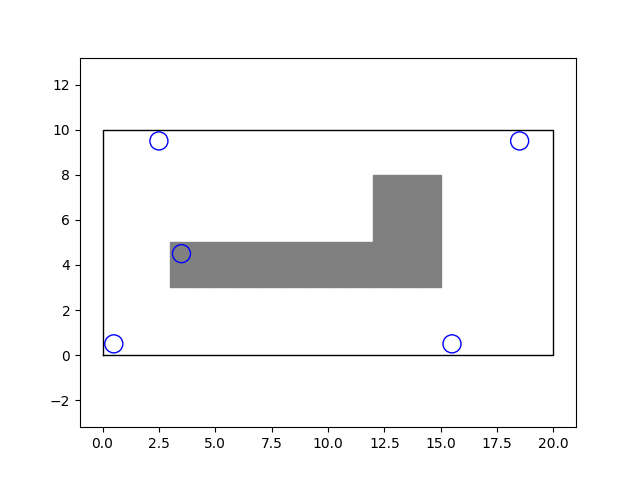

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
plt.axis('equal')
sim.plot(ax)
plt.show()

In [26]:
#do this then run the cell above to update the sim
sim.moveRobotRight(0)
sim.moveRobotRight(0)
sim.moveRobotRight(0)

True

In [34]:
sim.moveRobotDown(1)

Robot 1 crashed while moving down


False

In [35]:
hallway = RobotGridSimulation(6,10,6)
for i in range(3,7):
    for j in range(0,2):
        hallway.obstacles[i][j] = True
    for j in range(4,6):
        hallway.obstacles[i][j] = True
hallway.robots[0] = (0,0)
hallway.robots[1] = (1,0)
hallway.robots[2] = (2,0)
hallway.robots[3] = (7,0)
hallway.robots[4] = (8,0)
hallway.robots[5] = (9,0)

<IPython.core.display.Javascript object>


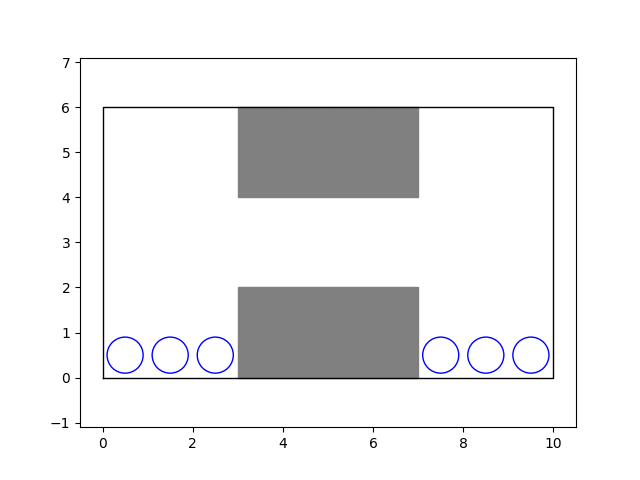

In [36]:
fig = plt.figure()
ax = plt.subplot(111)
plt.axis('equal')
hallway.plot(ax)
plt.show()

## Exchange policies

The problem of coordinating multiple robots in narrow passages can be very hard, such as when the above hallway is shrunk to 1 cell across.  If two robots enter a narrow hallway, there is going to certainly be *deadlock* where one cannot make progress toward its goal without the other reversing its progress.

However, an efficient *exchange policy* can be applied in certain scenarios to avoid deadlocks. Under the following conditions:

* Two robots are in a free 2x2 square
* Each robot has a path in mind such that the next step toward their goals is also contained within the square
* There are no obstacles or other robots in the square
* Their next-step goals are not the same cell

In this case, either the robots can proceed to make progress toward their goals, or one can move out of the way so the other can pass.

In [37]:
def exchange2x2(a0,b0,adest,bdest):
    """Given a and b within a 2x2 cell with no other obstacles, returns
    a sequence of moves that will get a from position a0 to adest and b
    from position b0 to bdest.
    
    The sequence is a list in the form ['au','bl*','ar'] where the first
    character is the object to move, and the second character is the direction
    (u: up, d: down, r: right, l: left)
    If the third character * is given, then this means it can be done at the same time as the 
    previous action
    """
    assert a0 != b0,"Objects have the same start?"
    assert adest != bdest,"Objects have the same destination?"
    xlow = min(a0[0],b0[0],adest[0],bdest[0])
    assert max(a0[0],b0[0],adest[0],bdest[0]) <= xlow+1,"Objects aren't in a 2x2 box?"
    ylow = min(a0[1],b0[1],adest[1],bdest[1])
    assert max(a0[1],b0[1],adest[1],bdest[1]) <= ylow+1,"Objects aren't in a 2x2 box?"
    a0 = (a0[0]-xlow,a0[1]-ylow)
    b0 = (b0[0]-xlow,b0[1]-ylow)
    adest = (adest[0]-xlow,adest[1]-ylow)
    bdest = (bdest[0]-xlow,bdest[1]-ylow)
    path = []
    while a0 != adest or b0 != bdest:
        #print a0,b0
        aopts = []
        aacts = []
        bopts = []
        bacts = []
        if adest[0] > a0[0]:
            aopts.append((1,a0[1]))
            aacts.append('r')
        elif adest[0] < a0[0]:
            aopts.append((0,a0[1]))
            aacts.append('l')
        if adest[1] > a0[1]:
            aopts.append((a0[0],1))
            aacts.append('u')
        elif adest[1] < a0[1]:
            aopts.append((a0[0],0))
            aacts.append('d')
        if bdest[0] > b0[0]:
            bopts.append((1,b0[1]))
            bacts.append('r')
        elif bdest[0] < b0[0]:
            bopts.append((0,b0[1]))
            bacts.append('l')
        if bdest[1] > b0[1]:
            bopts.append((b0[0],1))
            bacts.append('u')
        elif bdest[1] < b0[1]:
            bopts.append((b0[0],0))
            bacts.append('d')
        #print "A options",aopts,"B options",bopts
        moved = False
        for i in range(len(aopts)):
            if aopts[i] != b0:
                path.append('a'+aacts[i])
                a0 = aopts[i]
                moved = True
                break
        for i in range(len(bopts)):
            if bopts[i] != a0:
                path.append('b'+bacts[i])
                if moved:
                    path[-1] = path[-1] + '*'
                b0 = bopts[i]
                moved = True
                break
        if not moved:
            if a0 == adest and b0 == bdest:
                break
            else:
                #might need to move the other out of the way
                if a0[0] == b0[0]:
                    if b0[0] == 0:
                        b0 = (1,b0[1])
                        path.append('br')
                    else:
                        b0 = (0,b0[1])
                        path.append('bl')
                else:
                    assert a0[1] == b0[1]
                    if b0[1] == 0:
                        b0 = (b0[0],1)
                        path.append('bu')
                    else:
                        b0 = (b0[0],0)
                        path.append('bd')
                #print "Moving B out of the way to",b0
    return path


Examples...
['bl']
['ar', 'bl*', 'au', 'bd*']
['br', 'au', 'bd*', 'bl']
['ar', 'br*']


<IPython.core.display.Javascript object>


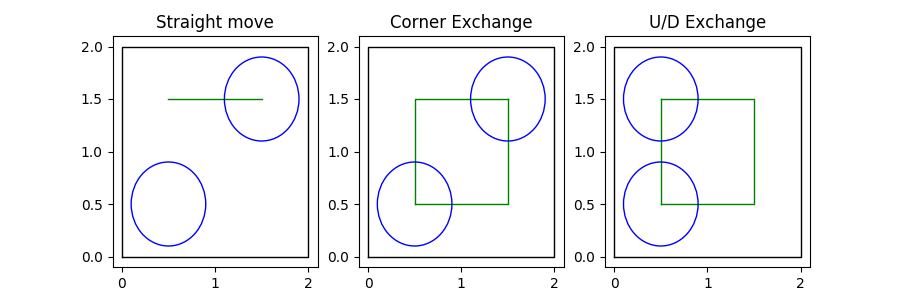

In [42]:
print "Examples..."
soln1 = exchange2x2((3,3),(4,4),(3,3),(3,4))
print soln1
soln2 = exchange2x2((3,3),(4,4),(4,4),(3,3))
print soln2
soln3 = exchange2x2((3,3),(3,4),(3,4),(3,3))
print soln3
soln4 = exchange2x2((3,3),(3,4),(4,3),(4,4))
print soln4
try:
    print exchange2x2((3,3),(5,4),(4,4),(3,3))
    print "HMM.... didn't catch exception?"
except Exception:
    pass

fig = plt.figure(figsize=(9,3))
ax = plt.subplot(131)
sim1 = RobotGridSimulation(2,2,2)
sim1.robots[0] = (0,0)
sim1.robots[1] = (1,1)
sim1.plot(ax)
sim1.plotPaths([((0 if mv[0] =='a' else 1),mv[1]) for mv in soln1],ax)
ax.set_title("Straight move")
ax = plt.subplot(132)
sim2 = RobotGridSimulation(2,2,2)
sim2.robots[0] = (0,0)
sim2.robots[1] = (1,1)
sim2.plot(ax)
sim2.plotPaths([((0 if mv[0] =='a' else 1),mv[1]) for mv in soln2],ax)
ax.set_title("Corner Exchange")
ax = plt.subplot(133)
sim3 = RobotGridSimulation(2,2,2)
sim3.robots[0] = (0,0)
sim3.robots[1] = (0,1)
sim3.plot(ax)
sim3.plotPaths([((0 if mv[0] =='a' else 1),mv[1]) for mv in soln3],ax)
ax.set_title("U/D Exchange")
fig.show()

## Assignment

Your job is to devise a planning approach that uses the exchange method to avoid deadlock.  Assume that each robot has a goal cell, and no two robots have the same goal.  Each robot can plan a path independently of all the other robots.  Can you then use the exchange method whenever two robots cross paths?

Implement such an algorithm.  You may find Dijkstra's algorithm helpful to generate single-robot paths.  It may also be useful to you to define a *next-desired-step* as a robot's next cell along its independently-planned path (this may also be a null movement if it is at the goal) and a *conflict*  as a situation where, for two robots A and B, the cells containing the current position of A and its next-desired-step overlap with the current position of B and its next-desired-step.

In your report, precisely and in technical English language (not code, although pseudocode may be acceptable), describe your strategy for resolving conflicts.  This description should include, but is not limited to:

1. When multiple conflicts are present on a given time step, which robots do you resolve first? 

2. Can you allow non-conflicting robots to move while conflicting robots are moving? 

3. How do you resolve the case when two robots on a single time step are approaching the same cell along their individual paths?


## Theoretical behavior

1. Describe as precisely as possible all of the inputs and outputs of your planner, so that a user of your planner would be able to confidently interpret how to encode and decode the problem.

2. Define as precisely as possible the assumptions under which your planner works, such as the layout of obstacles and the robots' start and goal locations.

3. How does the performance of the planner scale with respect to certain parameters, like the number of robots, grid size, distances between start and goal, or the choice of actions?

4. Describe the theoretical performance qualities of the planner.  Is it complete?  Optimal?  Probabilistic?